In [20]:
import pandas as pd
import numpy as np

In [26]:
# Import data
data = pd.read_csv('data_stocks.csv')

# drop date column
data = data.drop(['DATE'], 1)

# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

print(data)

           SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0      2363.6101     42.3300     143.6800     129.6300     82.0400   
1      2364.1001     42.3600     143.7000     130.3200     82.0800   
2      2362.6799     42.3100     143.6901     130.2250     82.0300   
3      2364.3101     42.3700     143.6400     130.0729     82.0000   
4      2364.8501     42.5378     143.6600     129.8800     82.0350   
5      2365.6201     42.5399     143.7800     130.0700     82.0400   
6      2365.2000     42.4700     143.8640     130.1800     82.1200   
7      2365.2900     42.4700     143.8100     130.1400     82.1900   
8      2364.3201     42.3900     143.8150     130.1000     82.2300   
9      2364.6399     42.3300     143.8000     130.2100     82.1650   
10     2364.5801     42.4000     143.8900     130.1400     82.2100   
11     2364.4800     42.2900     143.9700     130.3700     82.1500   
12     2365.2300     42.2900     143.9199     130.4599     82.1450   
13     2365.6599    

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

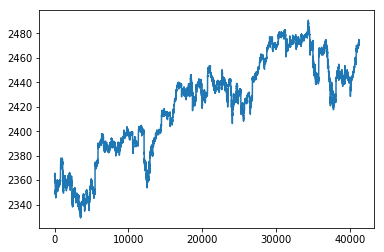

In [28]:
plt.plot(data['SP500'])

In [29]:
# make numpy array
data = data.values
print(data)

[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]


In [32]:
# Training and test data
# training are 80% of data so start from index 0
train_start = 0

# to index 80% of n (The data was not shuffled but sequentially sliced)
train_end = int(np.floor(0.8*n))

# then the test are the rest of data
test_start = train_end
test_end = n

data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]

print(data_train)

print(data_test)

[[2363.6101   42.33    143.68   ...   63.86    122.       53.35  ]
 [2364.1001   42.36    143.7    ...   63.74    121.77     53.35  ]
 [2362.6799   42.31    143.6901 ...   63.75    121.7      53.365 ]
 ...
 [2475.05     50.54    158.0143 ...   76.37    117.8688   61.535 ]
 [2474.8601   50.52    157.8701 ...   76.35    117.91     61.52  ]
 [2474.6201   50.52    157.8    ...   76.335   117.83     61.54  ]]
[[2474.9399   50.48    157.88   ...   76.33    117.75     61.53  ]
 [2474.73     50.4799  157.8236 ...   76.37    117.75     61.52  ]
 [2474.55     50.49    157.7841 ...   76.36    117.73     61.5   ]
 ...
 [2470.03     44.74    164.01   ...   76.88    114.31     62.685 ]
 [2471.49     44.71    163.88   ...   76.83    114.23     62.6301]
 [2471.49     44.74    163.98   ...   76.81    114.28     62.68  ]]


In [34]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

print(data_train)

print(data_test)

[[0.2242253  0.10993038 0.18116315 ... 0.05135952 0.37568157 0.09098787]
 [0.2274127  0.11212898 0.18219249 ... 0.04229607 0.36314068 0.09098787]
 [0.21817444 0.10846464 0.18168296 ... 0.04305136 0.35932388 0.09228769]
 ...
 [0.94913101 0.71161598 0.91890376 ... 0.99622356 0.1504253  0.80025997]
 [0.94789573 0.71015024 0.91148224 ... 0.99471299 0.15267176 0.79896014]
 [0.94633455 0.71015024 0.90787442 ... 0.99358006 0.14830971 0.80069324]]
[[ 0.94841482  0.70721876  0.91199177 ...  0.99320242  0.14394766
   0.79982669]
 [ 0.94704944  0.70721143  0.90908904 ...  0.99622356  0.14394766
   0.79896014]
 [ 0.94587856  0.70795163  0.9070561  ...  0.99546828  0.14285714
   0.79722704]
 ...
 [ 0.9164764   0.28655185  1.22748327 ...  1.0347432  -0.0436205
   0.89991334]
 [ 0.92597356  0.28435324  1.22079259 ...  1.03096677 -0.04798255
   0.89515598]
 [ 0.92597356  0.28655185  1.22593927 ...  1.02945619 -0.04525627
   0.89948007]]


In [35]:
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

print(X_train)
print(X_test)

print(y_train)
print(y_test)

[[0.10993038 0.18116315 0.06281066 ... 0.05135952 0.37568157 0.09098787]
 [0.11212898 0.18219249 0.09399006 ... 0.04229607 0.36314068 0.09098787]
 [0.10846464 0.18168296 0.08969724 ... 0.04305136 0.35932388 0.09228769]
 ...
 [0.71161598 0.91890376 0.82919114 ... 0.99622356 0.1504253  0.80025997]
 [0.71015024 0.91148224 0.82964302 ... 0.99471299 0.15267176 0.79896014]
 [0.71015024 0.90787442 0.82647989 ... 0.99358006 0.14830971 0.80069324]]
[[ 0.70721876  0.91199177  0.82693177 ...  0.99320242  0.14394766
   0.79982669]
 [ 0.70721143  0.90908904  0.82828739 ...  0.99622356  0.14394766
   0.79896014]
 [ 0.70795163  0.9070561   0.82873927 ...  0.99546828  0.14285714
   0.79722704]
 ...
 [ 0.28655185  1.22748327  1.21215545 ...  1.0347432  -0.0436205
   0.89991334]
 [ 0.28435324  1.22079259  1.20741075 ...  1.03096677 -0.04798255
   0.89515598]
 [ 0.28655185  1.22593927  1.21644826 ...  1.02945619 -0.04525627
   0.89948007]]
[0.2242253  0.2274127  0.21817444 ... 0.94913101 0.94789573 0.946